In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter

data = pd.read_csv("C:/Users/navan/Downloads/Merged01.csv")

import sys
print(sys.executable)
data

c:\Python312\python.exe


,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,19.92,6,63.36,25893.962218,0.00,0.0,0.00,0.99,0.99,0.0,...,6421,60,481,64.21,42.100000,64.21,0.000039,100,1772.410000,DDOS-PSHACK_FLOOD
1,0.00,47,64.00,3703.841331,0.00,0.0,0.00,0.00,0.00,0.0,...,57320,98,578,573.20,48.000000,573.20,0.000271,100,2304.000000,MIRAI-GREIP_FLOOD
2,7.92,17,65.91,19673.095685,0.00,0.0,0.00,0.00,0.00,0.0,...,6010,60,70,60.10,1.000000,60.10,0.000057,100,1.000000,DOS-UDP_FLOOD
3,20.40,6,110.50,261.664826,0.10,0.0,0.30,0.20,0.40,0.0,...,2223,54,1500,222.30,451.596686,222.30,0.004766,10,203939.566667,DNS_SPOOFING
4,0.32,1,63.96,28944.199848,0.00,0.0,0.00,0.00,0.01,0.0,...,6006,60,66,60.06,0.600000,60.06,0.000035,100,0.360000,DDOS-ICMP_FLOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712306,20.00,6,64.00,33177.535200,0.00,1.0,0.00,0.00,0.00,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000034,100,0.000000,DDOS-SYN_FLOOD
712307,8.00,17,64.00,49038.980475,0.00,0.0,0.00,0.00,0.00,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000020,100,0.000000,DOS-UDP_FLOOD
712308,20.00,6,67.82,10496.518932,0.98,0.0,0.98,0.01,0.02,0.0,...,6061,60,121,60.61,6.100000,60.61,0.000102,100,37.210000,DDOS-RSTFINFLOOD
712309,20.00,6,64.00,23321.123158,0.00,1.0,0.00,0.00,0.00,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000048,100,0.000000,DDOS-SYNONYMOUSIP_FLOOD


In [3]:
data.shape
data.dtypes

Header_Length      float64
Protocol Type        int64
Time_To_Live       float64
Rate               float64
fin_flag_number    float64
syn_flag_number    float64
rst_flag_number    float64
psh_flag_number    float64
ack_flag_number    float64
ece_flag_number    float64
cwr_flag_number    float64
ack_count            int64
syn_count            int64
fin_count            int64
rst_count            int64
HTTP               float64
HTTPS              float64
DNS                float64
Telnet             float64
SMTP               float64
SSH                float64
IRC                float64
TCP                float64
UDP                float64
DHCP               float64
ARP                float64
ICMP               float64
IGMP               float64
IPv                float64
LLC                float64
Tot sum              int64
Min                  int64
Max                  int64
AVG                float64
Std                float64
Tot size           float64
IAT                float64
N

In [4]:
data['Label'].unique()

array(['DDOS-PSHACK_FLOOD', 'MIRAI-GREIP_FLOOD', 'DOS-UDP_FLOOD',
       'DNS_SPOOFING', 'DDOS-ICMP_FLOOD', 'DDOS-TCP_FLOOD',
       'DDOS-SYN_FLOOD', 'DDOS-UDP_FLOOD', 'MITM-ARPSPOOFING',
       'DDOS-SYNONYMOUSIP_FLOOD', 'DOS-TCP_FLOOD', 'VULNERABILITYSCAN',
       'DOS-SYN_FLOOD', 'DDOS-RSTFINFLOOD', 'BENIGN', 'DDOS-SLOWLORIS',
       'DDOS-ICMP_FRAGMENTATION', 'MIRAI-GREETH_FLOOD',
       'RECON-HOSTDISCOVERY', 'MIRAI-UDPPLAIN', 'RECON-PORTSCAN',
       'DDOS-ACK_FRAGMENTATION', 'DDOS-UDP_FRAGMENTATION', 'RECON-OSSCAN',
       'BACKDOOR_MALWARE', 'DOS-HTTP_FLOOD', 'XSS', 'DDOS-HTTP_FLOOD',
       'BROWSERHIJACKING', 'SQLINJECTION', 'DICTIONARYBRUTEFORCE',
       'COMMANDINJECTION', 'RECON-PINGSWEEP', 'UPLOADING_ATTACK'],
      dtype=object)

In [5]:
d2 = data.copy()
d2 = d2.dropna()
d2.isna().any()

Header_Length      False
Protocol Type      False
Time_To_Live       False
Rate               False
fin_flag_number    False
syn_flag_number    False
rst_flag_number    False
psh_flag_number    False
ack_flag_number    False
ece_flag_number    False
cwr_flag_number    False
ack_count          False
syn_count          False
fin_count          False
rst_count          False
HTTP               False
HTTPS              False
DNS                False
Telnet             False
SMTP               False
SSH                False
IRC                False
TCP                False
UDP                False
DHCP               False
ARP                False
ICMP               False
IGMP               False
IPv                False
LLC                False
Tot sum            False
Min                False
Max                False
AVG                False
Std                False
Tot size           False
IAT                False
Number             False
Variance           False
Label              False


In [6]:
d2['fin_flag_number'].unique()

array([0.        , 0.1       , 0.99      , 1.        , 0.08      ,
       0.01      , 0.97      , 0.04      , 0.02      , 0.2       ,
       0.98      , 0.01041667, 0.94      , 0.03      , 0.91      ,
       0.96      , 0.67      , 0.95      , 0.05      , 0.4       ,
       0.16      , 0.3       , 0.45      , 0.6       , 0.06      ,
       0.07      , 0.11      , 0.02247191, 0.01298701, 0.38      ,
       0.09      , 0.5       , 0.85      , 0.83      , 0.53      ,
       0.61      , 0.93      , 0.69      , 0.63      , 0.92      ,
       0.76      , 0.15      , 0.13      , 0.12      , 0.89      ,
       0.81      , 0.79      , 0.18      , 0.88      , 0.31      ,
       0.87      , 0.9       , 0.86      , 0.24      , 0.01886792,
       0.66      , 0.14      , 0.28      , 0.21      , 0.33      ,
       0.84      , 0.46      , 0.26      , 0.32      , 0.97183099,
       0.48      , 0.02941176, 0.01785714, 0.19      , 0.25      ,
       0.68      , 0.02222222, 0.78      , 0.54      , 0.01190

In [7]:
d2['fin_flag_number'].value_counts()

fin_flag_number
0.000000    630905
1.000000     50159
0.010000     12109
0.990000      8495
0.100000      3378
             ...  
0.750000         1
0.370000         1
0.031579         1
0.510000         1
0.020833         1
Name: count, Length: 109, dtype: int64

In [8]:
ddos_labels = [
    'DDOS-PSHACK_FLOOD', 'MIRAI-GREIP_FLOOD', 'DOS-UDP_FLOOD',
    'DDOS-ICMP_FLOOD', 'DDOS-TCP_FLOOD', 'DDOS-SYN_FLOOD',
    'DDOS-UDP_FLOOD', 'DDOS-SYNONYMOUSIP_FLOOD', 'DOS-TCP_FLOOD',
    'DOS-SYN_FLOOD', 'DDOS-RSTFINFLOOD', 'DDOS-SLOWLORIS',
    'DDOS-ICMP_FRAGMENTATION', 'MIRAI-GREETH_FLOOD',
    'DDOS-ACK_FRAGMENTATION', 'DDOS-UDP_FRAGMENTATION',
    'DOS-HTTP_FLOOD', 'DDOS-HTTP_FLOOD'
]

# Convert labels into two categories: 'DDoS Attack' (1) and 'Not a DDoS Attack' (0)
d2['Category'] = d2['Label'].apply(lambda x: 1 if x in ddos_labels else 0)

# Verify the distribution
print(d2['Category'].value_counts())

Category
1    663930
0     48370
Name: count, dtype: int64


In [9]:
print("Duplicate rows before removal:", d2.duplicated().sum())

# Remove duplicates
d2 = d2.drop_duplicates()
# y_resampled_df = y_resampled_df.loc[X_resampled.index]

print("Duplicate rows after removal:", d2.duplicated().sum())

Duplicate rows before removal: 167368
Duplicate rows after removal: 0


In [10]:
d2=d2.reset_index(drop=True)

In [11]:

from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming d2 is your DataFrame

# Remove rows with infinite values
d2_cleaned = d2[~d2.isin([np.inf, -np.inf]).any(axis=1)]

# Define X (features) and y (labels)
X = d2_cleaned.drop(columns=['Label', 'Category'])  # Drop Label, keep only features
y = d2_cleaned['Category']  # Binary target variable

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Category'])

# Print unique values after SMOTE
print("\nUnique values in each column (after SMOTE):")
for col in X_resampled_df.columns:
    print(f"{col}: {X_resampled_df[col].unique()}")

# Print unique values in the target variable
print(f"\nCategory (target variable) unique values after SMOTE: {y_resampled_df['Category'].unique()}")
# Verify the new class distribution
print("Class Distribution After SMOTE:", Counter(y_resampled))

# print(X)



Unique values in each column (after SMOTE):
Header_Length: [19.92        0.          7.92       ... 29.63150061 30.5969477
 12.4765744 ]
Protocol Type: [ 6 47 17  1  0  8 14  9 10 16 11 13  7 12 15  2  5  4  3]
Time_To_Live: [ 63.36        64.          65.91       ... 134.14491903  68.64224962
  75.5039605 ]
Rate: [25893.96221756  3703.84133095 19673.0956848  ...    80.52935755
    99.69549301  6734.15229942]
fin_flag_number: [0.         0.1        0.99       ... 0.11105655 0.01466373 0.01791165]
syn_flag_number: [0.         1.         0.19       ... 0.05662186 0.08208835 0.09338091]
rst_flag_number: [0.         0.3        0.81       ... 0.91176902 0.03048057 0.29870749]
psh_flag_number: [0.99       0.         0.2        ... 0.37401561 0.52835341 0.01323818]
ack_flag_number: [0.99       0.         0.4        ... 0.92598439 0.88208835 0.12647636]
ece_flag_number: [0.         0.06       0.01       ... 0.0772641  0.00924725 0.15502705]
cwr_flag_number: [0.         0.02       0.01       .

In [12]:
# X_resampled_df=X_resampled_df.reset_index(drop=True)

In [13]:
X_resampled_df

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance
0,19.920000,6,63.360000,25893.962218,0.000000,0.000000,0.0,0.990000,0.990000,0.0,...,0.990000,6421,60,481,64.210000,42.100000,64.210000,0.000039,100,1.772410e+03
1,0.000000,47,64.000000,3703.841331,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,1.000000,57320,98,578,573.200000,48.000000,573.200000,0.000271,100,2.304000e+03
2,7.920000,17,65.910000,19673.095685,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,1.000000,6010,60,70,60.100000,1.000000,60.100000,0.000057,100,1.000000e+00
3,20.400000,6,110.500000,261.664826,0.100000,0.000000,0.3,0.200000,0.400000,0.0,...,0.900000,2223,54,1500,222.300000,451.596686,222.300000,0.004766,10,2.039396e+05
4,0.320000,1,63.960000,28944.199848,0.000000,0.000000,0.0,0.000000,0.010000,0.0,...,1.000000,6006,60,66,60.060000,0.600000,60.060000,0.000035,100,3.600000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993661,31.539457,6,69.500038,413.652320,0.000000,0.000000,0.0,0.080811,0.980811,0.0,...,1.000000,19332,66,4132,1933.244803,1247.512306,1933.244803,0.002641,10,1.556287e+06
993662,29.631501,6,134.144919,112.904080,0.000000,0.000000,0.0,0.374016,0.925984,0.0,...,0.925984,1394,63,640,139.451960,178.956211,139.451960,0.011450,10,3.202534e+04
993663,30.596948,6,68.642250,80.529358,0.017912,0.082088,0.0,0.528353,0.882088,0.0,...,1.000000,3093,64,1205,309.383534,462.001740,309.383534,0.013428,10,2.134457e+05
993664,12.476574,16,75.503961,99.695493,0.000000,0.093381,0.0,0.013238,0.126476,0.0,...,0.993381,1799,60,304,179.903568,106.023829,179.903568,0.010511,10,1.124106e+04


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled_df)

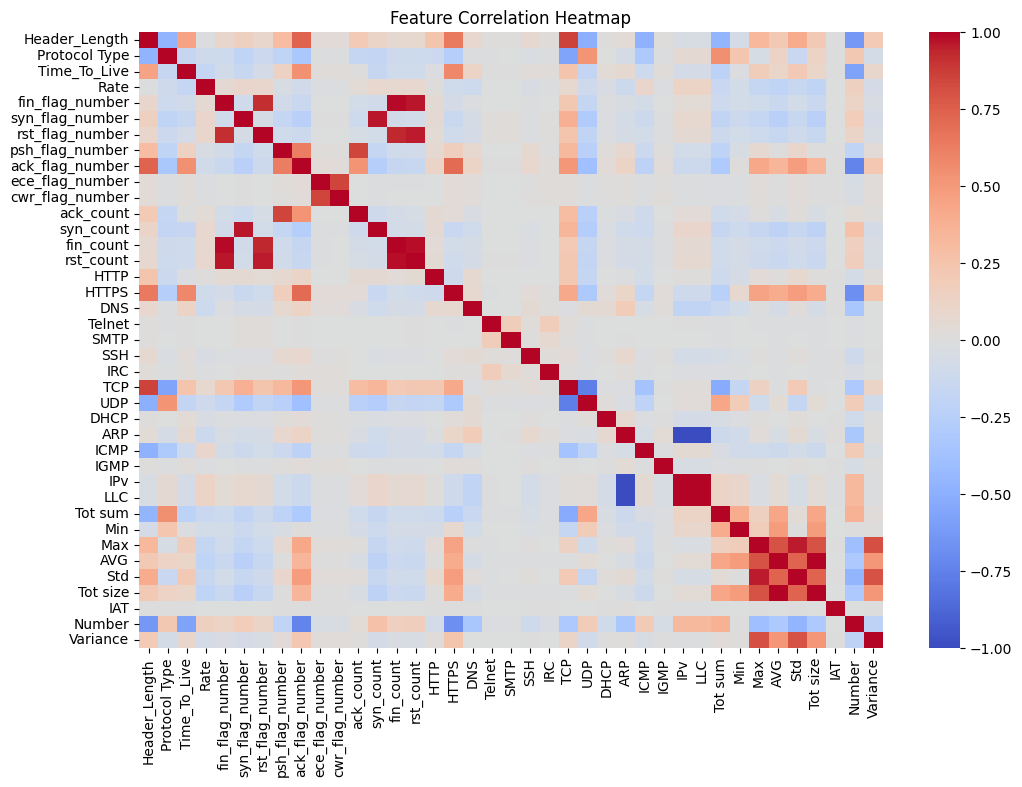

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

X_resampled_sdf = pd.DataFrame(X_resampled_scaled, columns=X.columns)
corr_matrix = X_resampled_sdf.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

import numpy as np



# Compute VIF for each feature

vif_data = pd.DataFrame()

vif_data["Feature"] = X_resampled_sdf.columns

vif_data["VIF"] = [variance_inflation_factor(X_resampled_sdf.values, I) for I in range(X_resampled_sdf.shape[1])]



# Display features with high multicollinearity

print(vif_data.sort_values(by="VIF", ascending=False))

c:\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


            Feature           VIF
25              ARP           inf
33              AVG  2.271858e+06
35         Tot size  6.691127e+04
28              IPv  2.121385e+04
29              LLC  2.121385e+04
22              TCP  1.520778e+02
13        fin_count  1.003200e+02
4   fin_flag_number  7.394897e+01
23              UDP  5.899775e+01
14        rst_count  4.742284e+01
26             ICMP  4.671758e+01
0     Header_Length  3.269927e+01
8   ack_flag_number  3.210130e+01
34              Std  2.946169e+01
5   syn_flag_number  2.728715e+01
12        syn_count  2.600042e+01
32              Max  2.390161e+01
6   rst_flag_number  2.134115e+01
1     Protocol Type  1.963344e+01
37           Number  1.159892e+01
11        ack_count  1.048798e+01
7   psh_flag_number  5.271045e+00
16            HTTPS  4.036647e+00
38         Variance  3.953659e+00
30          Tot sum  3.903892e+00
9   ece_flag_number  3.520217e+00
10  cwr_flag_number  3.515947e+00
31              Min  2.799948e+00
2      Time_To

In [18]:

remove=["ARP", "IPv", "LLC", "TCP", "UDP", "Std", "ack_flag_number", "rst_count",
    "ICMP", "syn_flag_number", "syn_count", "Protocol Type", "rst_flag_number",
    "fin_flag_number", "fin_count", "Max", "Header_Length"]

X_preprocessed=X_resampled_sdf.drop(remove,axis=1)
# X_resampled_reduced, final_vif = remove_high_vif_features(X_resampled_sdf)

# print("Remaining Features After VIF Reduction:\n", X_resampled_reduced.columns)
# print("Final VIF Values:\n", final_vif)
X_preprocessed

,Time_To_Live,Rate,psh_flag_number,ece_flag_number,cwr_flag_number,ack_count,HTTP,HTTPS,DNS,Telnet,...,IRC,DHCP,IGMP,Tot sum,Min,AVG,Tot size,IAT,Number,Variance
0,-0.476274,0.212222,3.826025,-0.039541,-0.03381,4.309256,-0.290334,-0.590172,-0.28327,-0.019071,...,-0.029939,-0.081104,-0.040106,-0.417810,-0.315593,-0.583381,-0.583381,-0.007005,0.755430,-0.171259
1,-0.457149,-0.340010,-0.473778,-0.039541,-0.03381,-0.374021,-0.290334,-0.618518,-0.28327,-0.019071,...,-0.029939,-0.081104,-0.040106,2.007717,-0.141268,0.615407,0.615407,-0.006700,0.755430,-0.170774
2,-0.400074,0.057407,-0.473778,-0.039541,-0.03381,-0.374021,-0.290334,-0.618518,-0.28327,-0.019071,...,-0.029939,-0.081104,-0.040106,-0.437396,-0.315593,-0.593061,-0.593061,-0.006980,0.755430,-0.172877
3,0.932383,-0.425673,0.394869,-0.039541,-0.03381,-0.184798,-0.290334,0.798807,-0.28327,-0.019071,...,-0.029939,-0.081104,-0.040106,-0.617861,-0.343118,-0.211043,-0.211043,-0.000794,-1.325698,0.013337
4,-0.458345,0.288132,-0.473778,-0.039541,-0.03381,-0.326715,-0.290334,-0.590172,-0.28327,-0.019071,...,-0.029939,-0.081104,-0.040106,-0.437587,-0.315593,-0.593155,-0.593155,-0.007010,0.755430,-0.172877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993661,-0.292795,-0.421891,-0.122798,-0.039541,-0.03381,0.051732,-0.290334,2.161737,-0.28327,-0.019071,...,-0.029939,-0.081104,-0.040106,0.197447,-0.288068,3.818623,3.818623,-0.003586,-1.325698,1.248144
993662,1.638950,-0.429376,1.150660,-0.039541,-0.03381,0.051732,-0.290334,1.649202,-0.28327,-0.019071,...,-0.029939,-0.081104,-0.040106,-0.657366,-0.301831,-0.406169,-0.406169,0.007987,-1.325698,-0.143636
993663,-0.318428,-0.430181,1.820985,-0.039541,-0.03381,0.004426,0.182608,0.231877,-0.28327,-0.019071,...,-0.029939,-0.081104,-0.040106,-0.576402,-0.297243,-0.005941,-0.005941,0.010586,-1.325698,0.022016
993664,-0.113383,-0.429704,-0.416282,-0.039541,-0.03381,-0.326715,0.182608,-0.278765,5.30893,-0.019071,...,-0.029939,-0.081104,-0.040106,-0.638066,-0.315593,-0.310896,-0.310896,0.006754,-1.325698,-0.162613


In [ ]:
X_preprocessed.shape

(993666, 22)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_resampled_df, test_size=0.2, random_state=42)
print("Train set:", X_train.shape, "Test set:", X_test.shape)

Train set: (794932, 22) Test set: (198734, 22)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logreg))

# Decision Tree Model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dtree))

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy: 0.9622409854378214
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     99289
           1       1.00      0.93      0.96     99445

    accuracy                           0.96    198734
   macro avg       0.96      0.96      0.96    198734
weighted avg       0.96      0.96      0.96    198734

Decision Tree Accuracy: 0.9992653496633691
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99289
           1       1.00      1.00      1.00     99445

    accuracy                           1.00    198734
   macro avg       1.00      1.00      1.00    198734
weighted avg       1.00      1.00      1.00    198734



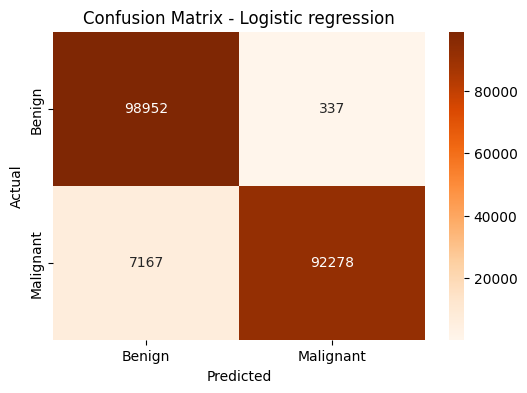

In [22]:
from sklearn.metrics import confusion_matrix
# Plot confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic regression')
plt.show()

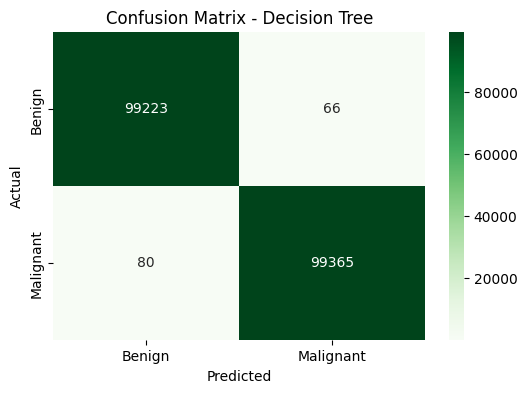

In [ ]:
# Plot confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_dtree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()



In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize KNN with k=5 (you can tune this)
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # p=2 is for Euclidean distance

# Train the model
knn.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Evaluate performance
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report (KNN):\n", classification_report(y_test, y_pred_knn))

c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Accuracy: 0.9982438837843549
Classification Report (KNN):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99289
           1       1.00      1.00      1.00     99445

    accuracy                           1.00    198734
   macro avg       1.00      1.00      1.00    198734
weighted avg       1.00      1.00      1.00    198734



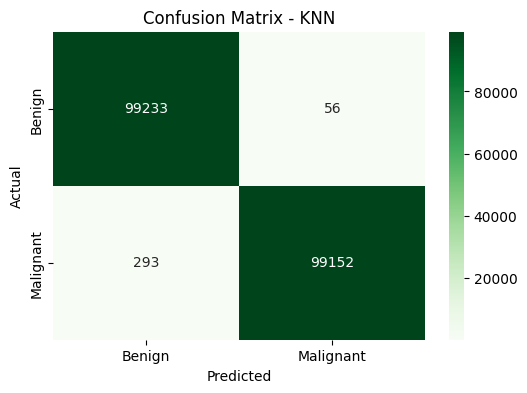

In [25]:
# Plot confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()



In [ ]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report

# # Initialize the SVM model
# svm_model = SVC(kernel='linear')  # You can try 'rbf' kernel as well

# # Train the model
# svm_model.fit(X_train, y_train)

# # Predict on test data
# y_pred_svm = svm_model.predict(X_test)

# # Evaluate performance
# print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
# print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))

In [ ]:
from sklearn.model_selection import cross_val_score

# Apply 5-Fold Cross-Validation on Decision Tree
dtree_cv_scores = cross_val_score(dtree, X_preprocessed, y_resampled_df, cv=5, scoring='accuracy')

print("Decision Tree Cross-Validation Accuracy:", dtree_cv_scores)
print("Mean Accuracy:", dtree_cv_scores.mean())
print("Standard Deviation:", dtree_cv_scores.std())

Decision Tree Cross-Validation Accuracy: [0.99912446 0.99942637 0.9991798  0.99935089 0.99929554]
Mean Accuracy: 0.999275410601704
Standard Deviation: 0.00011028761923136703


In [ ]:
# Apply 5-Fold Cross-Validation on LR
lr_cv_scores = cross_val_score(logreg, X_preprocessed, y_resampled_df, cv=5, scoring='accuracy')

print("Logistic Regression Cross-Validation Accuracy:", lr_cv_scores)
print("Mean Accuracy:", lr_cv_scores.mean())
print("Standard Deviation:", lr_cv_scores.std())

/home/noserotonin/miniconda3/envs/tf_gpu/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/noserotonin/miniconda3/envs/tf_gpu/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/noserotonin/miniconda3/envs/tf_gpu/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/noserotonin/miniconda3/envs/tf_gpu/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWar

Logistic Regression Cross-Validation Accuracy: [0.96796723 0.96460075 0.96149608 0.95937263 0.95740013]
Mean Accuracy: 0.9621673622727652
Standard Deviation: 0.003756262293046497


In [ ]:
# Apply 5-Fold Cross-Validation on kNN
knn_cv_scores = cross_val_score(knn, X_preprocessed, y_resampled_df, cv=5, scoring='accuracy')

print("kNN Cross-Validation Accuracy:", knn_cv_scores)
print("Mean Accuracy:", knn_cv_scores.mean())
print("Standard Deviation:", knn_cv_scores.std())

/home/noserotonin/miniconda3/envs/tf_gpu/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/noserotonin/miniconda3/envs/tf_gpu/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/noserotonin/miniconda3/envs/tf_gpu/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/noserotonin/miniconda3/envs/tf_gpu/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversi

kNN Cross-Validation Accuracy: [0.9985307  0.99854579 0.9982791  0.99812814 0.9982791 ]
Mean Accuracy: 0.9983525649683754
Standard Deviation: 0.00016138609294448876


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 10],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 5, 10]  
}

# Perform grid search
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_preprocessed, y_resampled_df)

# Print best hyperparameters
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Accuracy: 0.998313316561181


In [ ]:
best_model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, random_state=42)
best_model.fit(X_train, y_train)

# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Training Accuracy: 0.9986313294722065
Test Accuracy: 0.9982791067457003


In [ ]:
# from cuml.neighbors import KNeighborsClassifier
# from sklearn.model_selection import RandomizedSearchCV

# knn_gpu = KNeighborsClassifier()

# param_dist = {
#     'n_neighbors': range(1, 50, 2),
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan', 'minkowski']
# }

# random_search = RandomizedSearchCV(knn_gpu, param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
# random_search.fit(X_preprocessed, y_resampled_df)

# print("Best Hyperparameters:", random_search.best_params_)

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np

# param_dist = {
#     'n_neighbors': np.arange(1, 50, 2),
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan', 'minkowski']
# }

# random_search = RandomizedSearchCV(knn, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
# random_search.fit(X_preprocessed, y_resampled_df)

# print("Best Hyperparameters:", random_search.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate performance
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print("Random Forest Training Accuracy:", train_acc_rf)
print("Random Forest Test Accuracy:", test_acc_rf)
print("Classification Report (Random Forest):\n", classification_report(y_test, y_test_pred_rf))

/home/noserotonin/miniconda3/envs/tf_gpu/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Training Accuracy: 0.9986162338413852
Random Forest Test Accuracy: 0.9983243934102871
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99289
           1       1.00      1.00      1.00     99445

    accuracy                           1.00    198734
   macro avg       1.00      1.00      1.00    198734
weighted avg       1.00      1.00      1.00    198734



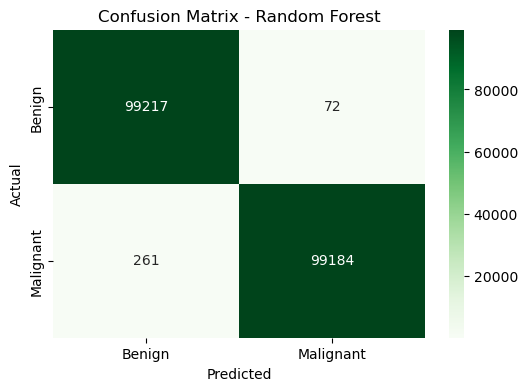

In [ ]:
from sklearn.metrics import confusion_matrix
# Plot confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

/home/noserotonin/miniconda3/envs/tf_gpu/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
24842/24842 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step - accuracy: 0.9853 - loss: 0.0481 - val_accuracy: 0.9961 - val_loss: 0.0116
Epoch 2/50
24842/24842 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.9949 - loss: 0.0169 - val_accuracy: 0.9963 - val_loss: 0.0117
Epoch 3/50
24842/24842 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.9957 - loss: 0.0168 - val_accuracy: 0.9970 - val_loss: 0.0088
Epoch 4/50
24842/24842 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.9960 - loss: 0.0137 - val_accuracy: 0.9972 - val_loss: 0.0090
Epoch 5/50
24842/24842 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.9960 - loss: 0.0153 - val_accuracy: 0.9975 - val_loss: 0.0078
Epoch 6/50
24842/24842 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.9962 - loss: 0.0130 - val_accuracy: 0.9973 - val_loss: 0.0091
Epoch 7/50
24842/24842 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.9963 - loss: 0.0125 - val_accuracy: 0.9971 - val_loss: 0.0090
Epoch 8/50
24842/24842 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 

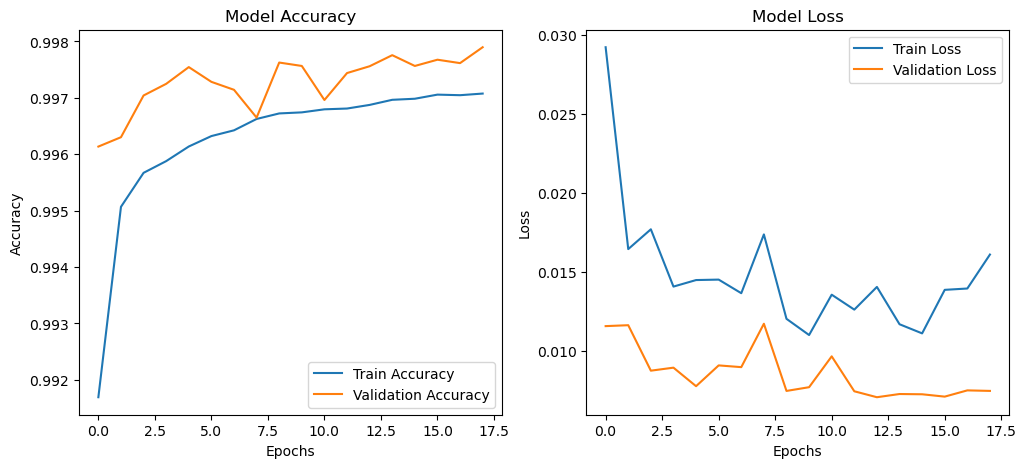

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report

# Define the ANN model
def create_ann_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model
input_dim = X_train.shape[1]
ann_model = create_ann_model(input_dim)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the ANN model
history = ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Predictions
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("Classification Report (ANN):\n", classification_report(y_test, y_pred_ann))

# Plot training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

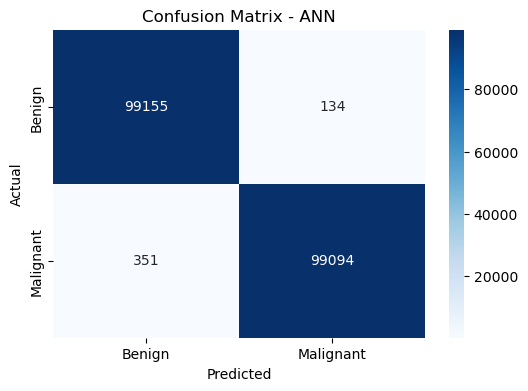

In [ ]:

cm = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ANN')
plt.show()
